In [680]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

In [681]:
cs = ["slide_21","slide_22","slide_26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
[#new anti correlated best
#55,56,59,63,83,94,95,100,121,125,131.2,            11
#strong signal medium anti correlation:
#43,80,98,102,103,Nenad                             6
]
#lb = ["P055","P056","P059","P063","P083","P094","P095","P100","P121","P125","P131.2","P043","P080","P098","P102","P103","Nenad"]

spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
#spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
spots_dj = spots_dj.filter(circle_quality__gte = 0.3)


In [682]:
np.random.RandomState(12345)

In [689]:
reload(a2)

<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analyse_wepdata/analysis2.py'>

In [684]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

In [685]:
lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)
lb

Ligand Batch
P059      2.748757
P131.2    2.085057
P103      1.700012
P106      1.549660
P124      1.526043
P055      1.469093
P081      1.252572
P072      1.247708
P082      1.094670
P121      1.085903
P048      1.082581
P122      1.044894
P050      1.030039
P008      0.941486
P047      0.876679
P054      0.863125
P056      0.822283
P105      0.817929
P095      0.813476
P044      0.784177
P104      0.762752
P063      0.734281
P010      0.691711
P100      0.671286
P045.3    0.631887
P009      0.608685
P090      0.606081
P083      0.582825
P073      0.534438
P086      0.479541
P088      0.461759
P057      0.423910
P043      0.400447
P102      0.388895
P096      0.324408
LF        0.301020
P084      0.295155
P094      0.285242
Nenad     0.274404
P080      0.199812
P060      0.157666
P061      0.111761
P101      0.088797
P098      0.056847
dtype: float64

In [699]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
#lb

In [687]:
complete = data.train_test_combinations[:1]
complete["Test"]=[tuple(cs)]*len(complete)
complete["Train"]=[tuple(cs)]*len(complete)
complete.loc[1] = complete.loc[0]

/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [646]:
#data = a2.Data(spots_dj=spots_dj).sample_on_collection(2000).clean()

KeyboardInterrupt: 

In [ ]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
for n,d in data.x["P131.2"].groupby("Analyte Batch"):
    sns.distplot(d,label=n, ax=ax)
plt.legend()
plt.show()

In [640]:
pbs[0]
spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pbs[0])
data = a2.Data(spots_dj=spots_this)
data.x.groupby("Collection").count()


Ligand Batch,P059
Collection,
slide_21,3
slide_22,7
slide_23,9
slide_26,9
slide_27,9
slide_28,9
slide_31,6
slide_32,9
slide_33,9


In [696]:
frames = []

for pb in pbs[:25]:
    spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pb)
    data = a2.Data(spots_dj=spots_this)
    data = data.outlier_filtering().sample_on_collection(200).clean()
    #ana = a2.Analysis(data, train_test = data.train_test_combinations[:25])
    ana = a2.Analysis(data,train_test=complete)
    ana.calculate_all()
    frames.append(ana.complete_information())


*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models****

In [700]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")

In [790]:
result

Predictions  \
Peptide Batches Analyte Batch                          Collection Sample                                           
1               A/Brisbaine/59/2007(H1N1)-2018-03-20   slide_26   0          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  1          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  2          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  3          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  4          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  5          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  6          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  7          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  8          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  9          A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  10         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  11         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  12         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  13         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  14         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  15         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  16         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  17         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  18         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  19         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  20         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  21         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  22         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  23         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  24         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  25         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  26         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  27         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  28         A/Brisbane/10/2007(H3N2)-2017-07-05   
                                                                  29         A/Brisbane/10/2007(H3N2)-2017-07-05   
...                                                                                                          ...   
25              A/Hong Kong/4801/2014(H3N2)-2018-03-20 slide_23   170     A/Hong Kong/4801/2014(H3N2)-2018-03-20   
                                                                  171     A/Hong Kong/4801/2014(H3N2)-2018-03-20   
                                         

In [791]:
result["TrueFalse"].value_counts()

1    80410
0    29590
Name: TrueFalse, dtype: int64

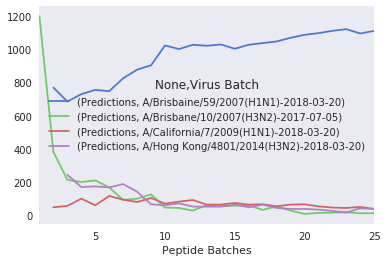

In [819]:
one_virus_data = result[result["y"] == "A/Brisbaine/59/2007(H1N1)-2018-03-20"]
values = pd.DataFrame(one_virus_data.groupby("Peptide Batches")["Predictions"].value_counts())
values.index.names = ['Peptide Batches', 'Virus Batch']
data = pd.pivot_table(values, values=["Predictions"],index=["Peptide Batches"],columns=["Virus Batch"])
data.plot()
plt.show()

In [835]:
one_virus_data.groupby(["Peptide Batches","Collection"]).apply(lambda x:  np.amax(x["Predictions"]))
one_virus_data

one_virus_data[one_virus_data.index.get_level_values("Peptide Batches") == 20]["Predictions"].value_counts().idxmax()

u'A/Brisbaine/59/2007(H1N1)-2018-03-20'

In [837]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)


In [838]:
#result_m_mean = result_m.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean().reset_index()


KeyError: u'Test'

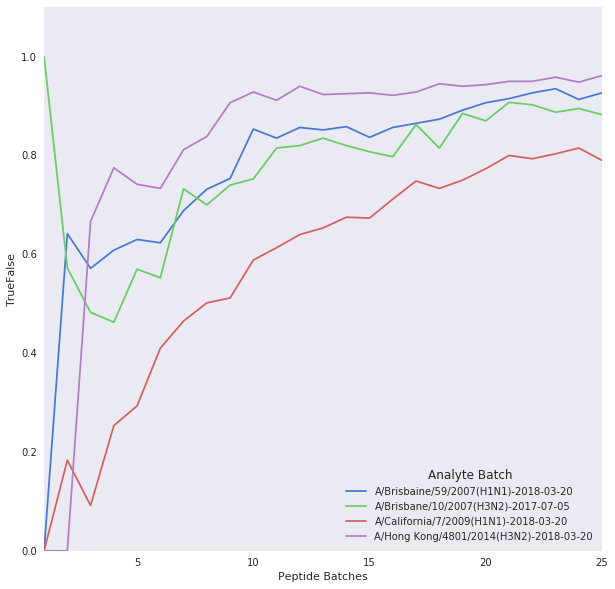

In [701]:
sns.set(style="dark", palette="muted", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax.set_ylim(0,1.1)
plt.show()

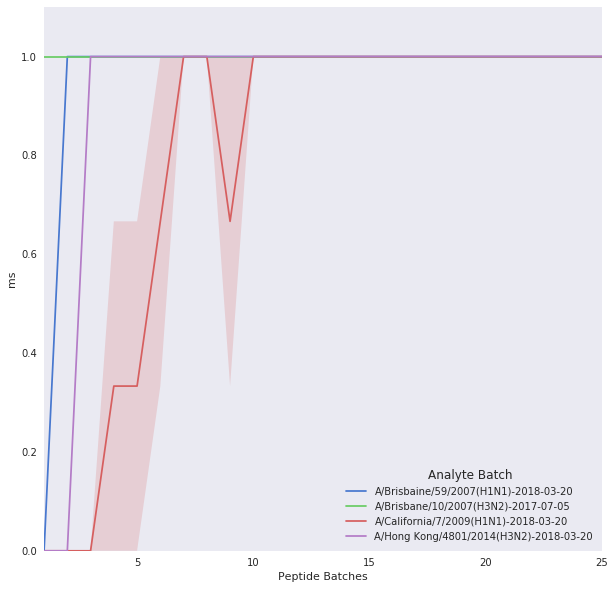

In [840]:
sns.set(style="dark", palette="muted", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m)
ax.set_ylim(0,1.1)
plt.show()

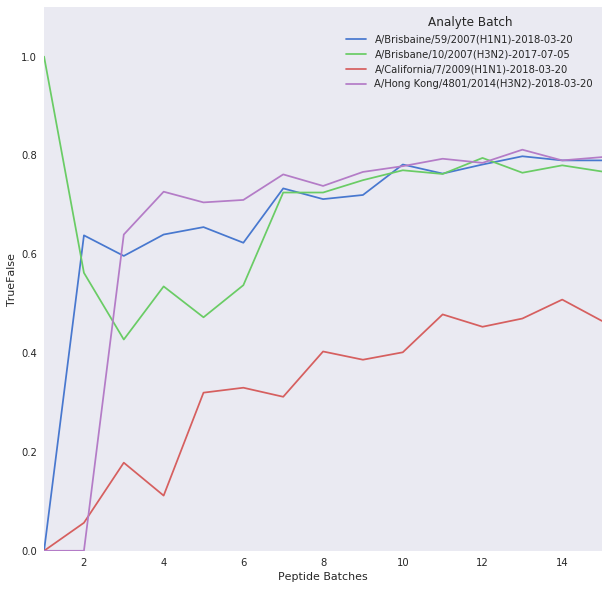

In [692]:
sns.set(style="dark", palette="muted", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax.set_ylim(0,1.1)
plt.show()

In [535]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [648]:
reload(a2)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

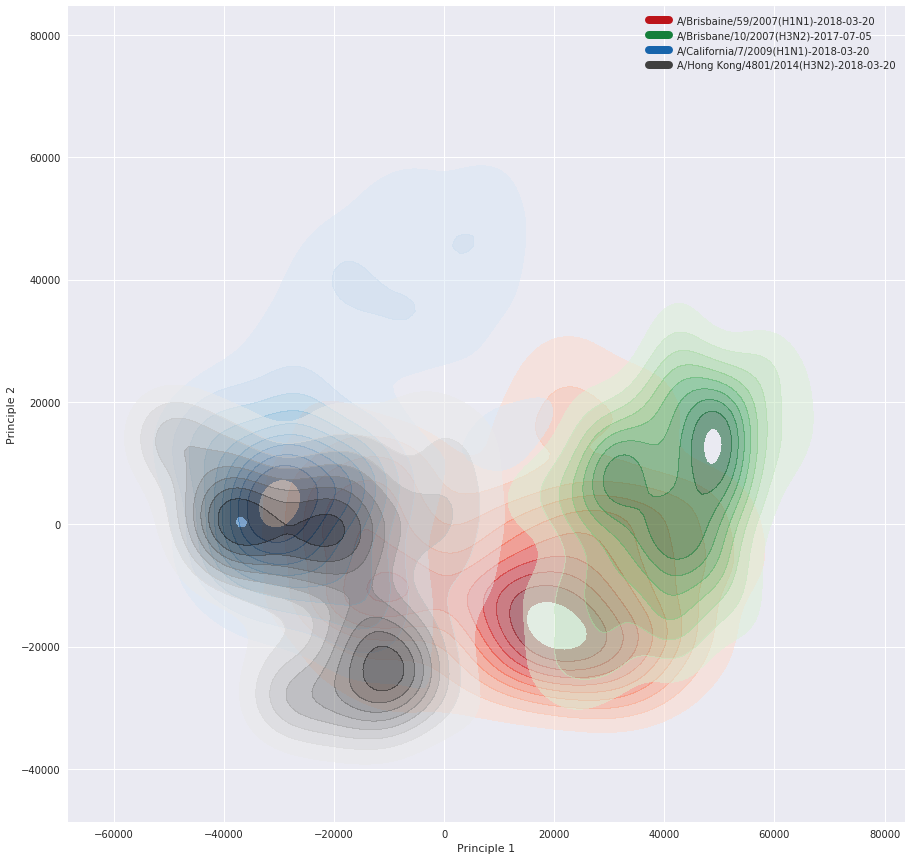

In [530]:

fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [671]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [675]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

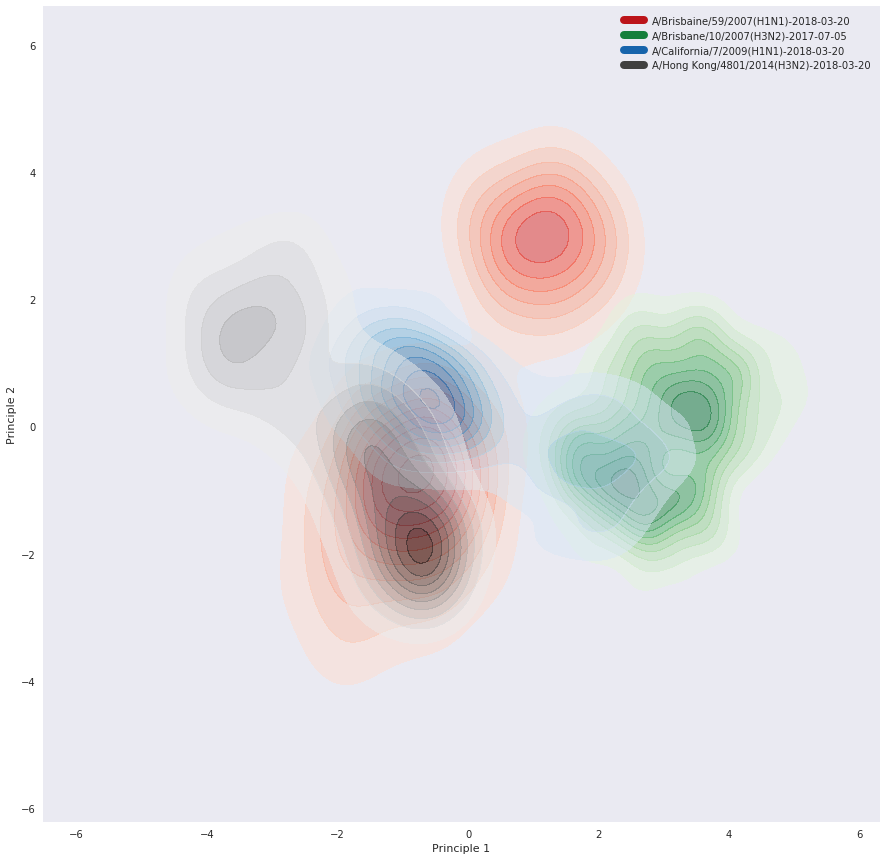

In [679]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

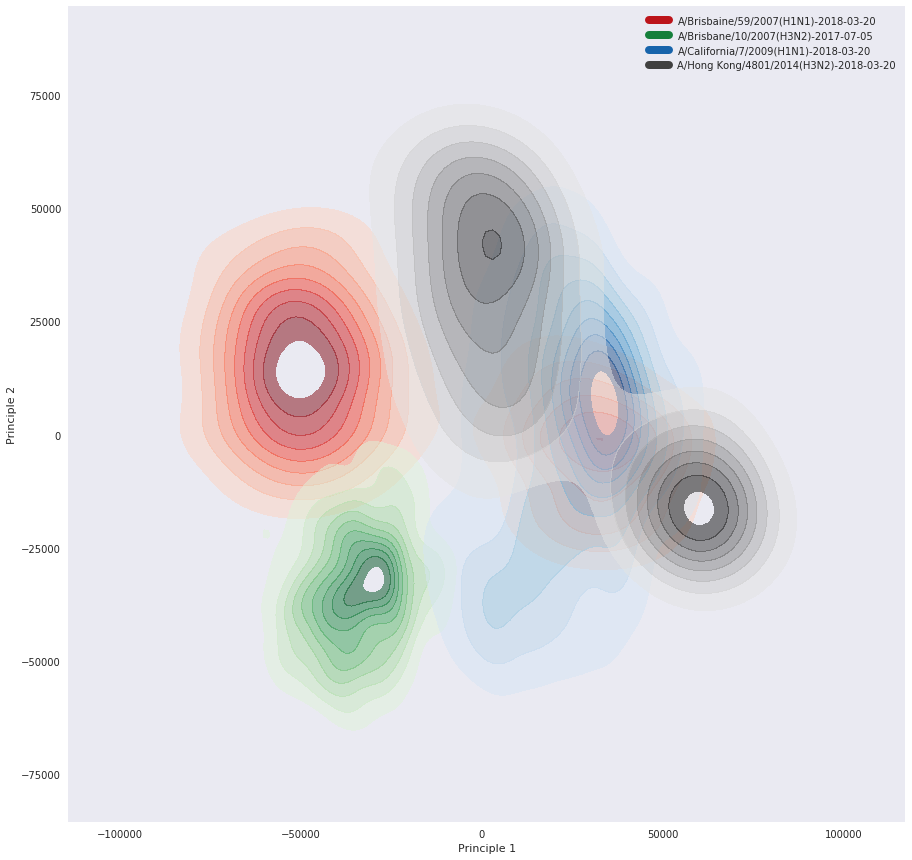

In [652]:
data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,:2],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()